## Best Neighborhood in Pittsburgh

### Using police incident data to determine the safest neighborhood

In [354]:
# Importing pandas
import pandas as pd
import numpy as np

# To make 2D charts and graphs from data
%matplotlib inline

In [387]:
# load in the police incident data file
policeData = pd.read_csv("https://data.wprdc.org/datastore/dump/1797ead8-8262-41cc-9099-cbc8a161924b")
# drop line with insufficient data
policeData.drop([994,1398,1405,1413,1414,1534,1552,1583,1600,1797,1873,2197,2204,2206,2348,2489,2496,2512,2522,2637,2639,2715,2725,2796,2801,2964,3081], axis=0)
policeData.head(10)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,214368107,19220799,99,2019-10-29T13:40:00,"Cecil Pl & Penn Ave Pittsburgh, PA 15222",N,Central Business District,2,FOUND PROPERTY,9489 Found Property,201.0,6.0,6.0,-80.003100,40.442497
1,214376833,19220899,99,2019-10-29T16:12:00,"200 Block Mayflower St Pittsburgh, PA 15206",N,Larimer,5,MISCELLANEOUS FIRE OTHER INVEST CONTINUED,9123 Miscellaneous Fire Other Investigation to...,1208.0,NaN,NaN,0.000000,0.000000
2,214379292,19220863,26,2019-10-28T16:00:00,"2600 Block Centre Ave Pittsburgh, PA 15219",Y,Terrace Village,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(4) Harassment Communicates Prohibited ...,510.0,6.0,3.0,-79.968380,40.446506
3,214379407,19221009,6,2019-10-29T15:00:00,"900 Block Beech Ave Pittsburgh, PA 15233",N,Allegheny West,1,THEFT FROM AUTO,3934 Theft from Vehicle,2201.0,NaN,NaN,0.000000,0.000000
4,214379413,19211917,6,2019-10-17T12:25:00,"600 Block 1st Ave Pittsburgh, PA 15219",Y,Central Business District,2,RETAIL THEFT (SHOPLIFTING),3929 Retail Theft.,201.0,6.0,6.0,-79.996041,40.435040
5,214380175,19221016,99,2019-10-29T18:37:00,"3800 Block O Hara St Pittsburgh, PA 15213",Y,North Oakland,4,BENCH WARRANT ARREST - NO TIE,9501 Bench Warrant,403.0,NaN,NaN,0.000000,0.000000
6,-3280001155,19221042,99,2019-10-29T19:15:00,"100 Block Alluvian St Pittsburgh, PA 15207",N,Hazelwood,4,ACCIDENTAL FIRE,9018 Accidental Fire,1515.0,NaN,NaN,0.000000,0.000000
7,214386102,19221084,99,2019-10-29T20:30:00,"3400 Block Colby St Pittsburgh, PA 15214",N,Summer Hill,1,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),2612.0,NaN,NaN,0.000000,0.000000
8,214189531,19218345,99,2019-10-26T08:48:00,"Moga St Pittsburgh, PA 15206",N,East Liberty,5,DEAD ON ARRIVAL (DOA),9496 Dead on Arrival (DOA),1113.0,9.0,2.0,-79.917510,40.467180
9,214093475,19217087,6,2019-10-24T14:30:00,"600 Block Melwood Ave Pittsburgh, PA 15213",N,North Oakland,4,THEFT FROM AUTO,3934 Theft from Vehicle,507.0,6.0,3.0,-79.954181,40.457576


In [388]:
#Counting number of police incidents for each neighborhood
neighborhoodCounts = pd.DataFrame(policeData['INCIDENTNEIGHBORHOOD'].value_counts())
neighborhoodCounts.rename(columns = {'INCIDENTNEIGHBORHOOD':'Aggregate Incidences'}, inplace = True)
neighborhoodCounts.head(10)

,Aggregate Incidences
Central Business District,244
South Side Flats,163
Carrick,132
Shadyside,92
East Liberty,89
Brookline,83
Mount Washington,73
Marshall-Shadeland,72
East Allegheny,65
Bluff,62


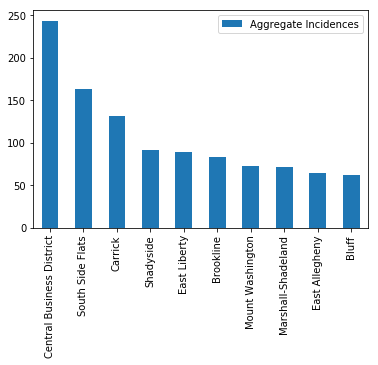

In [389]:
#plotting totals with bar graph
neighborhoodCounts.head(10).plot.bar()

In [390]:
#Looking at list in opposite order
neighborhoodCounts = pd.DataFrame(policeData['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True))
neighborhoodCounts.rename(columns = {'INCIDENTNEIGHBORHOOD':'Aggregate Incidences'})
neighborhoodCounts.head(10)

,INCIDENTNEIGHBORHOOD
Arlington Heights,1
Outside County,1
Regent Square,2
Swisshelm Park,2
New Homestead,2
Ridgemont,3
East Carnegie,3
Mount Oliver,3
Oakwood,3
Outside State,4


In [391]:
#Deleting irrelevant data
editedNC = neighborhoodCounts.copy()
editedNC.drop(["Outside County"], inplace=True)
editedNC.drop(["Outside State"], inplace=True)

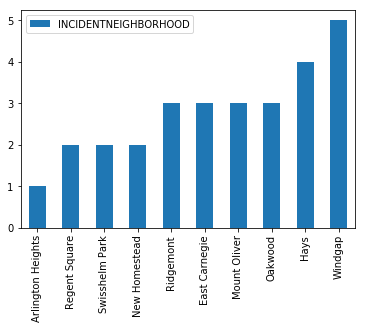

In [392]:
#plotting totals with bar graph
editedNC.head(10).plot.bar()

In [393]:
# What are the most popular incidents?
offenseCounts = pd.DataFrame(policeData['INCIDENTHIERARCHYDESC'].value_counts().sort_values(ascending=False))
offenseCounts

,INCIDENTHIERARCHYDESC
99,470
THEFT,317
HIT AND RUN,317
SIMPLE ASSAULT,178
CRIM MISCHIEF,147
THEFT FROM AUTO,118
BURGLARY,110
FOUND PROPERTY,86
HARRASSMENT,79
ROBBERY,78


In [402]:
#Looking into the types of offenses for neighborhoods
offensesDF = pd.DataFrame(index =[neighborhoodCounts.index.values], columns=["THEFT", "HIT AND RUN", "SIMPLE ASSAULT", "CRIM MISCHIEF", "THEFT FROM AUTO", "BURGLARY", "FOUND PROPERTY", "HARRASSMENT", "ROBBERY", "STOLEN PROPERTY"])
for row in range(len(offensesDF)):
    for column in range(len(offensesDF.columns)):
        offensesDF.iat[row,column] = 0
#num = 0
currNeighborhood = ""
offense = ""
for row in range(len(policeData)) :
    currNeighborhood = policeData.iat[row,6]
    offense = policeData.iat[row,8]
    if(currNeighborhood in offensesDF.index):
        if(offense=="THEFT"):
            offensesDF.loc[currNeighborhood, "THEFT"] += 1
        elif(offense=="HIT AND RUN"):
            offensesDF.loc[currNeighborhood, "HIT AND RUN"] += 1
        elif(offense=="SIMPLE ASSAULT"):
            offensesDF.loc[currNeighborhood, "SIMPLE ASSAULT"] += 1
        elif(offense=="CRIM MISCHIEF"):
            offensesDF.loc[currNeighborhood, "CRIM MISCHIEF"] += 1
        elif(offense=="THEFT FROM AUTO"):
            offensesDF.loc[currNeighborhood, "THEFT FROM AUTO"] += 1
        elif(offense=="BURGLARY"):
            offensesDF.loc[currNeighborhood, "BURGLARY"] += 1
        elif(offense=="FOUND PROPERTY"):
            offensesDF.loc[currNeighborhood, "FOUND PROPERTY"] += 1
        elif(offense=="HARRASSMENT"):
            offensesDF.loc[currNeighborhood, "HARRASSMENT"] += 1
        elif(offense=="ROBBERY"):
            offensesDF.loc[currNeighborhood, "ROBBERY"] += 1
        elif(offense=="STOLEN PROPERTY"):
            offensesDF.loc[currNeighborhood, "STOLEN PROPERTY"] += 1

# Most UNsafe neighborhoods
offensesDF.tail(10)


,THEFT,HIT AND RUN,SIMPLE ASSAULT,CRIM MISCHIEF,THEFT FROM AUTO,BURGLARY,FOUND PROPERTY,HARRASSMENT,ROBBERY,STOLEN PROPERTY
Knoxville,5,5,7,2,0,4,1,2,3,3
East Allegheny,3,6,0,2,0,5,4,1,0,3
Marshall-Shadeland,4,2,11,5,2,3,3,2,1,0
Mount Washington,4,10,2,4,9,3,1,2,2,2
Brookline,6,8,4,3,1,3,0,3,6,1
East Liberty,10,10,5,6,4,2,1,5,2,1
Shadyside,9,11,4,3,2,15,5,2,0,0
Carrick,11,14,11,10,8,7,0,4,2,1
South Side Flats,17,26,4,10,10,1,6,5,6,0
Central Business District,31,17,29,8,2,0,16,8,12,3


In [403]:
# Most safe neighborhoods
offensesDF.head(10)

,THEFT,HIT AND RUN,SIMPLE ASSAULT,CRIM MISCHIEF,THEFT FROM AUTO,BURGLARY,FOUND PROPERTY,HARRASSMENT,ROBBERY,STOLEN PROPERTY
Arlington Heights,1,0,0,0,0,0,0,0,0,0
Outside County,0,0,0,0,0,0,0,0,0,0
Regent Square,0,0,0,0,1,0,0,0,0,0
Swisshelm Park,0,0,0,0,1,0,0,0,1,0
New Homestead,0,0,1,0,0,0,0,0,0,0
Ridgemont,0,0,0,0,0,0,0,0,0,1
East Carnegie,0,0,0,0,0,0,0,1,0,0
Mount Oliver,2,1,0,0,0,0,0,0,0,0
Oakwood,1,0,1,0,0,0,0,0,0,0
Outside State,0,0,0,0,0,0,0,0,0,0
